Dataset : https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import random
from PIL import Image
from tqdm import tqdm

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

#### **Loading Data using Keras's Generator**

https://keras.io/api/data_loading/

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/train/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
# Normalize

def process(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#### **Model Bulidng**

In [14]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu', input_shape=(256,256,3)),)
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),)

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'),)
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),)

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'),)
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5038 - loss: 0.7299 - val_accuracy: 0.5410 - val_loss: 0.6937
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5450 - loss: 0.6852 - val_accuracy: 0.6010 - val_loss: 0.6555
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6270 - loss: 0.6424 - val_accuracy: 0.6660 - val_loss: 0.6258
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7148 - loss: 0.5713 - val_accuracy: 0.6920 - val_loss: 0.5950
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7526 - loss: 0.4972 - val_accuracy: 0.6860 - val_loss: 0.6899
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8184 - loss: 0.4003 - val_accuracy: 0.6750 - val_loss: 0.6435
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8750 - loss: 0.3026 - val_accuracy: 0.6800 - val_loss: 0.7993
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 972ms/step - accuracy: 0.9133 - loss: 0.2018 - val_accuracy: 0.6790 - val_lo

#### **Results**

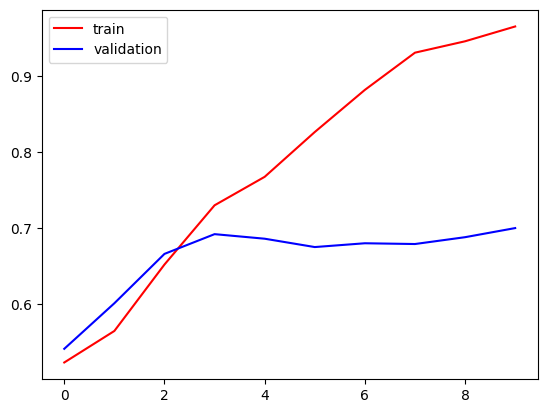

In [23]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

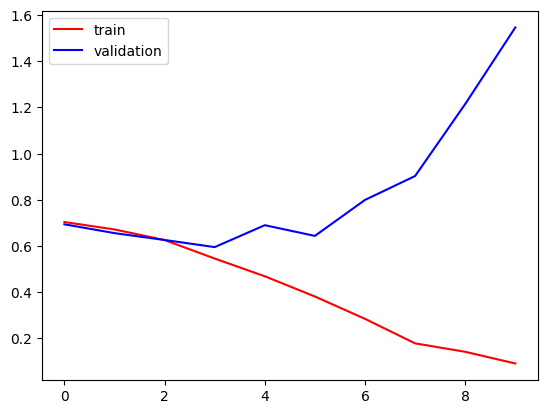

In [24]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

#### **Model Improvement**

Now from the above results it is clear that the model is overfitting

Steps to reduce overfitting:
- Add more Data
- Data Augmentation
- L1/L2 Regularization
- Droput
- Batch Normalization
- Reduce Complexity of Model